In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v
from cv2 import cvtColor,COLOR_HSV2RGB,inRange
from downloader import download_video
import display as d 

In [2]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [3]:
reload(v)
df= v.get_vid_df('videos/Banned Pokemon Seizure Scene.mp4')
fps = df.attrs['fps']

In [4]:
df.head()

hue  saturation  value
frame y x                        
0     0 0    0           0     36
        1    0           0     34
        2    0           0     32
        3    0           0     31
        4    0           0     31

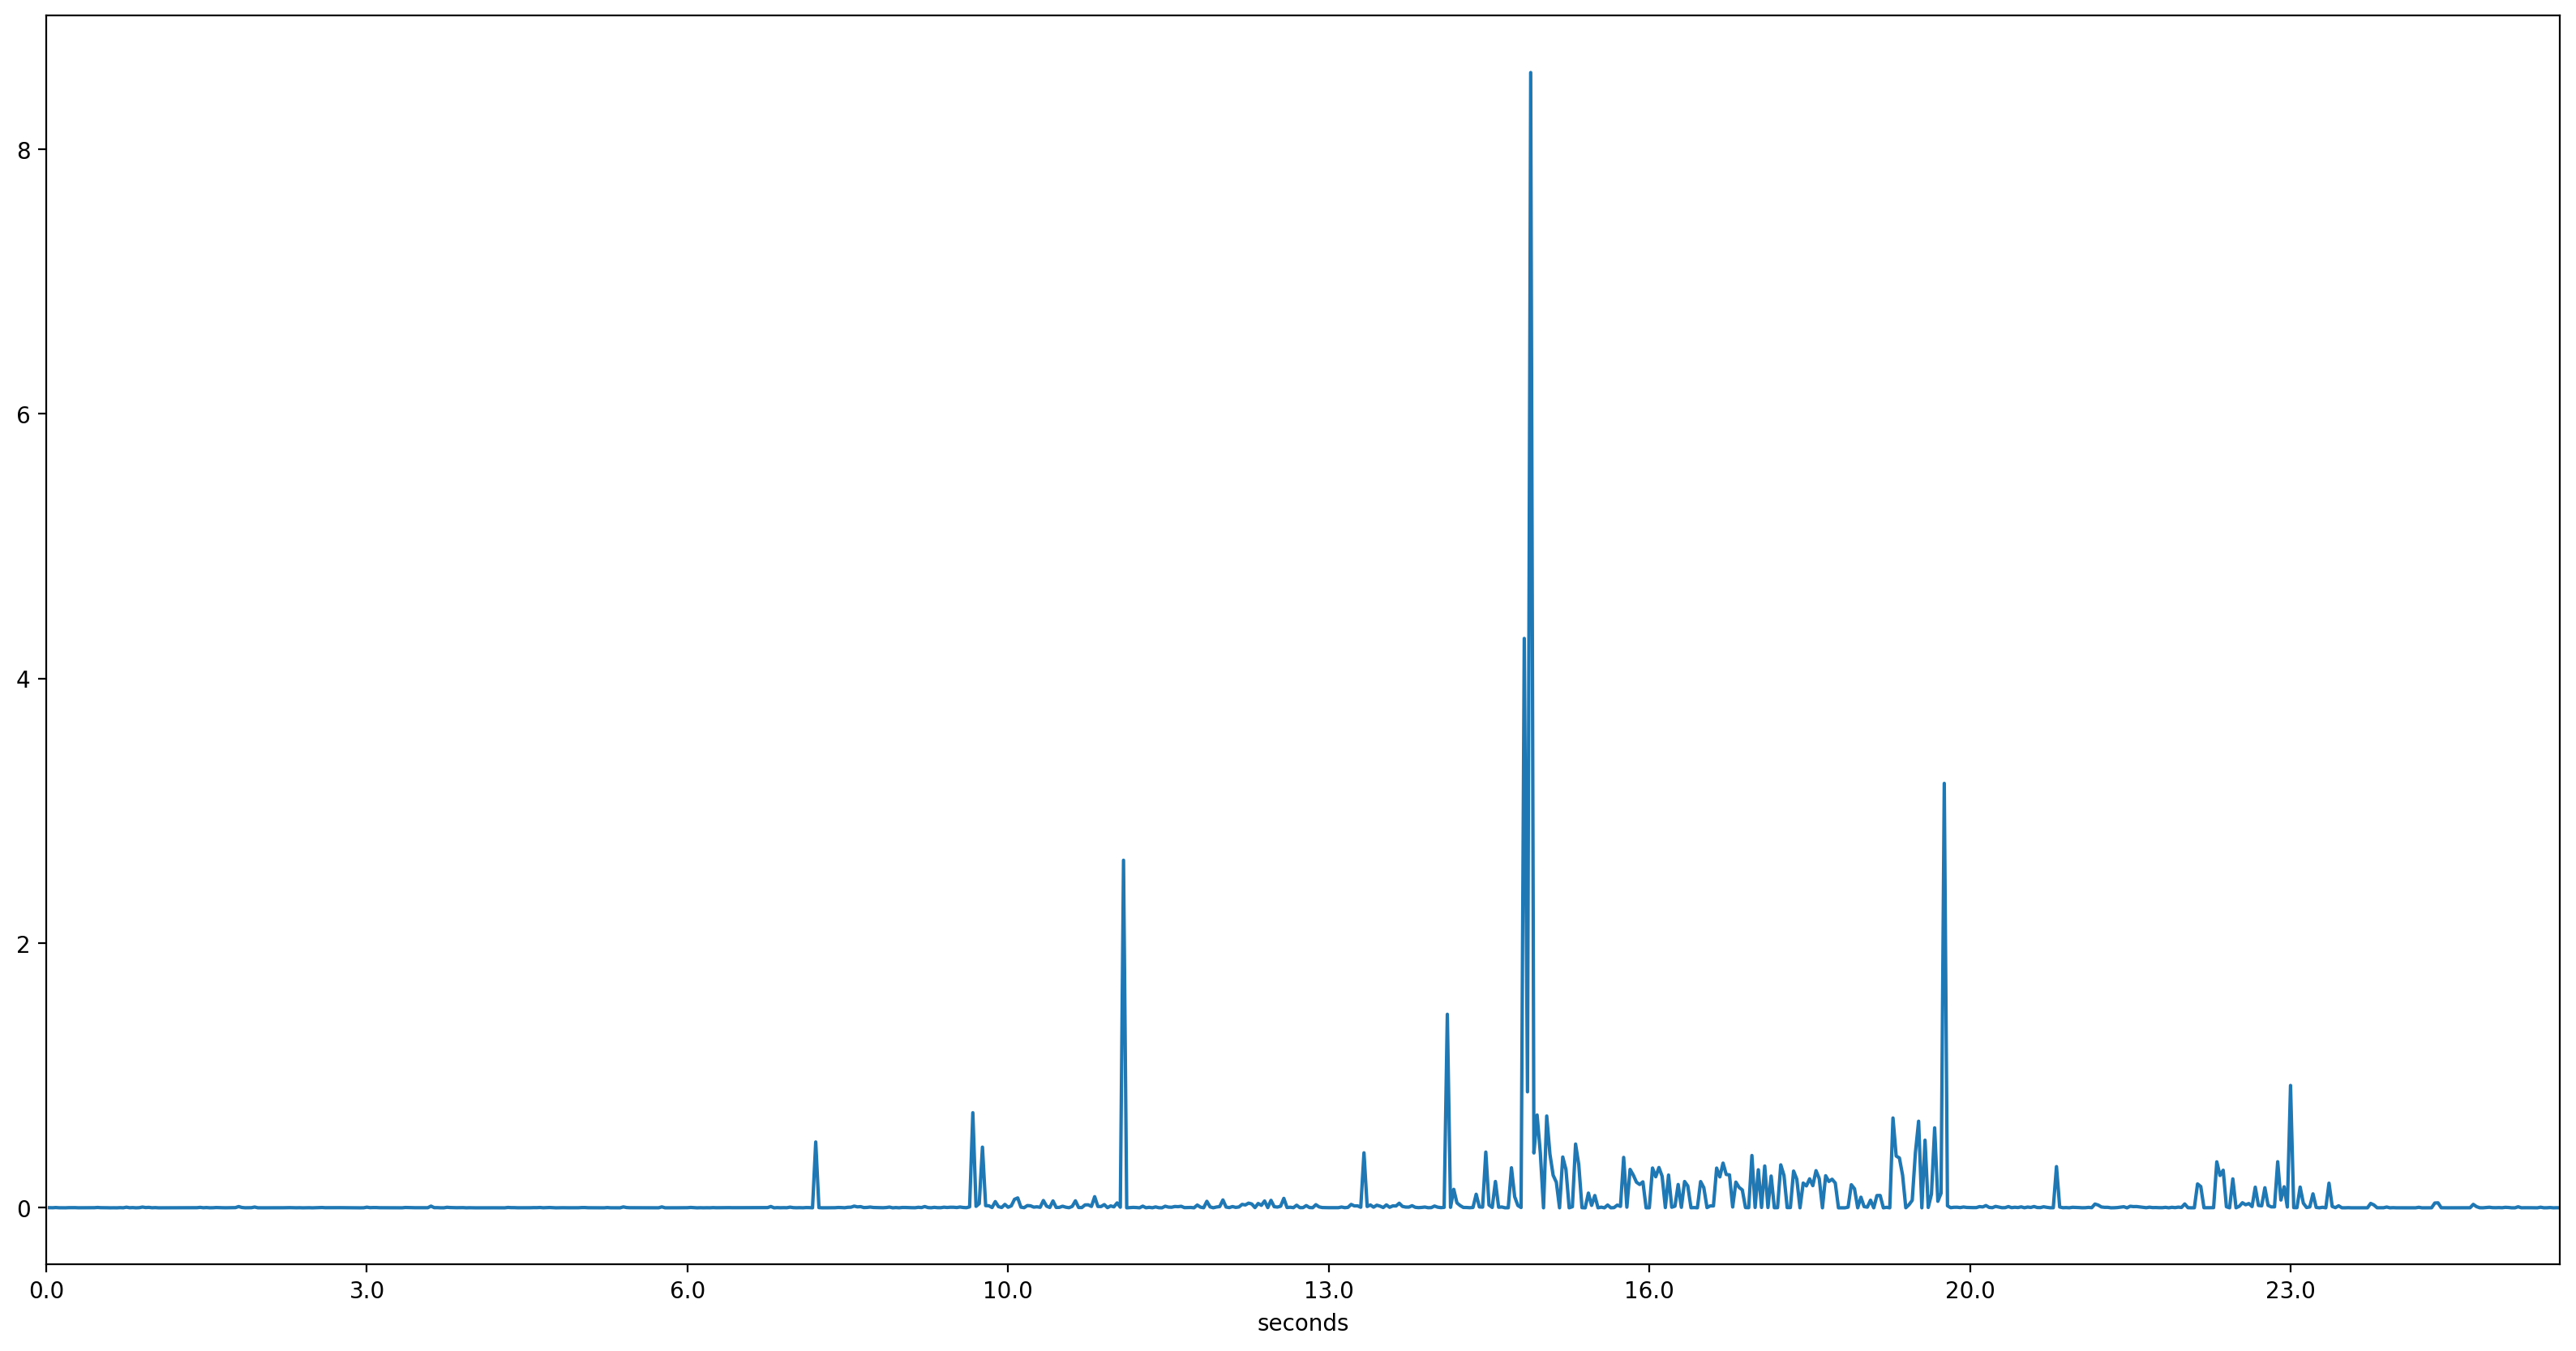

In [5]:
plt.figure(figsize=(20,10))
val = df.groupby('frame').hue.mean().pct_change(1).abs().plot.line()
val.set_xlim((0,df.index.get_level_values(0).max()))

val.set_xticklabels(val.get_xticks() // fps)
val.set_xlabel('seconds')
plt.show()

In [6]:
df.attrs['fps'] = 30

700 300 100 100


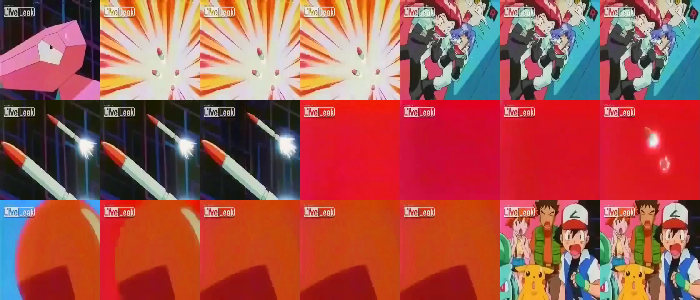

In [7]:
reload(d)
pct_change = df.groupby('frame').hue.mean().pct_change(3).abs()
pct_change = pct_change[pct_change > .5].sort_index().index
d.show_frame(df,pct_change,width=7)


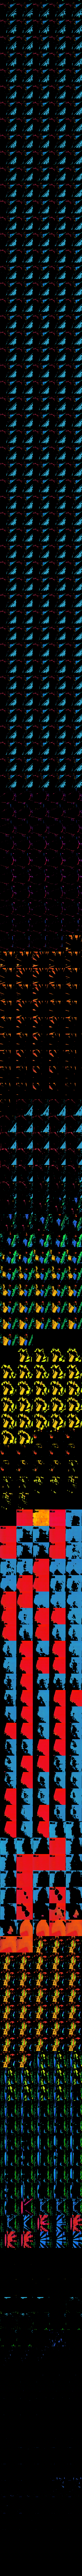

In [23]:
reload(d)
channel = 2
frame = df.to_numpy().reshape((-1,100,3))
channel_array = frame[:,:,channel]
mask = inRange(frame,np.asarray([0,190,0]),np.asarray([255,255,255]))
final_frame = frame.copy()
final_frame[:,:,2] = np.where(mask > 0,frame[:,:,1],0)
final_frame = final_frame.reshape((-1,100,100,3))
d.show_sequence(final_frame)

### Everything on one plot

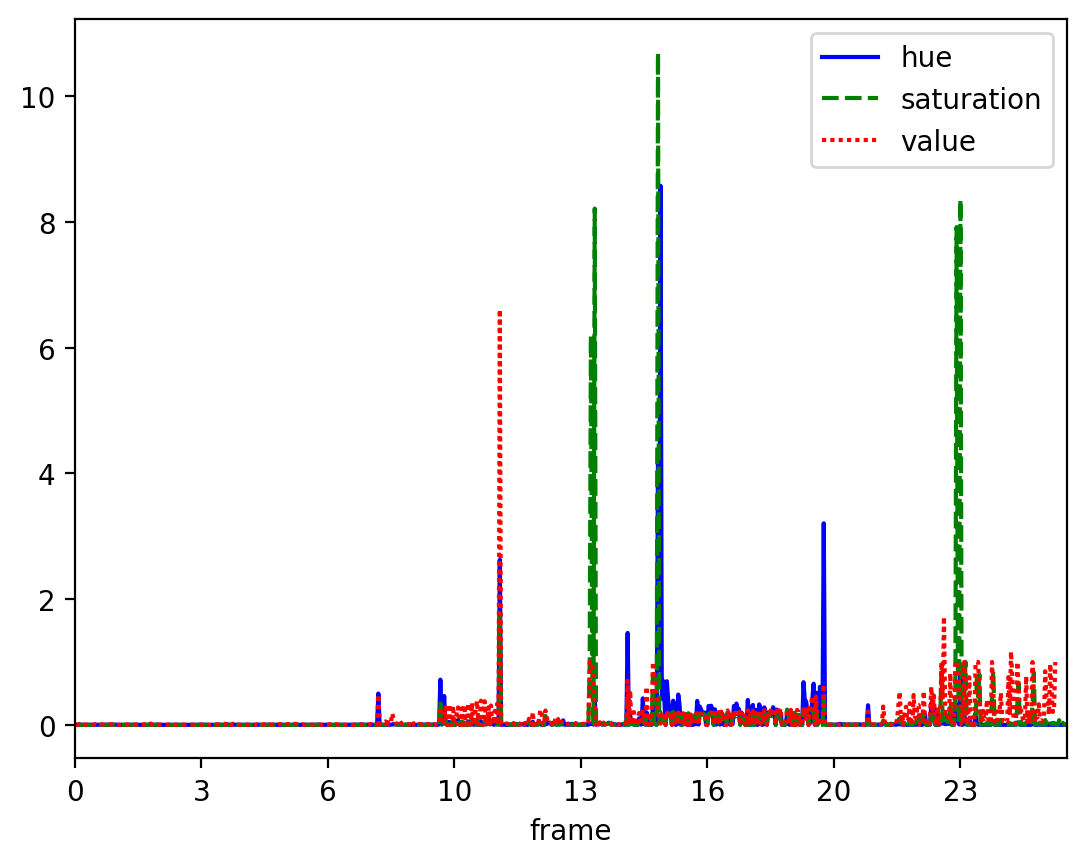

In [18]:
reload(v)
masked_df = v.get_vid_df(final_frame)
pct_line = lambda gb,key: gb[key].sum().pct_change(1).abs()
# fig, axs = plt.subplots(3,1,figsize=(10,20))
grouping = masked_df.groupby(level=0)
changes = pct_line(grouping,['hue','saturation','value'])
colors = ['blue','green','red']
ax = sns.lineplot(changes, palette=colors)
ax.set_xlim(0,changes.count()[0])
ax.set_xticklabels([int(label.get_text())//30 for label in ax.get_xticklabels()])
# ax.set_ylim(0)
plt.show()

### Individual graphs

In [19]:
pct_line(masked_df.groupby('frame'),'value')

frame
0           NaN
1      0.007014
2      0.001683
3      0.004145
4      0.014015
         ...   
780         NaN
781         NaN
782         NaN
783         NaN
784         NaN
Name: value, Length: 785, dtype: float64

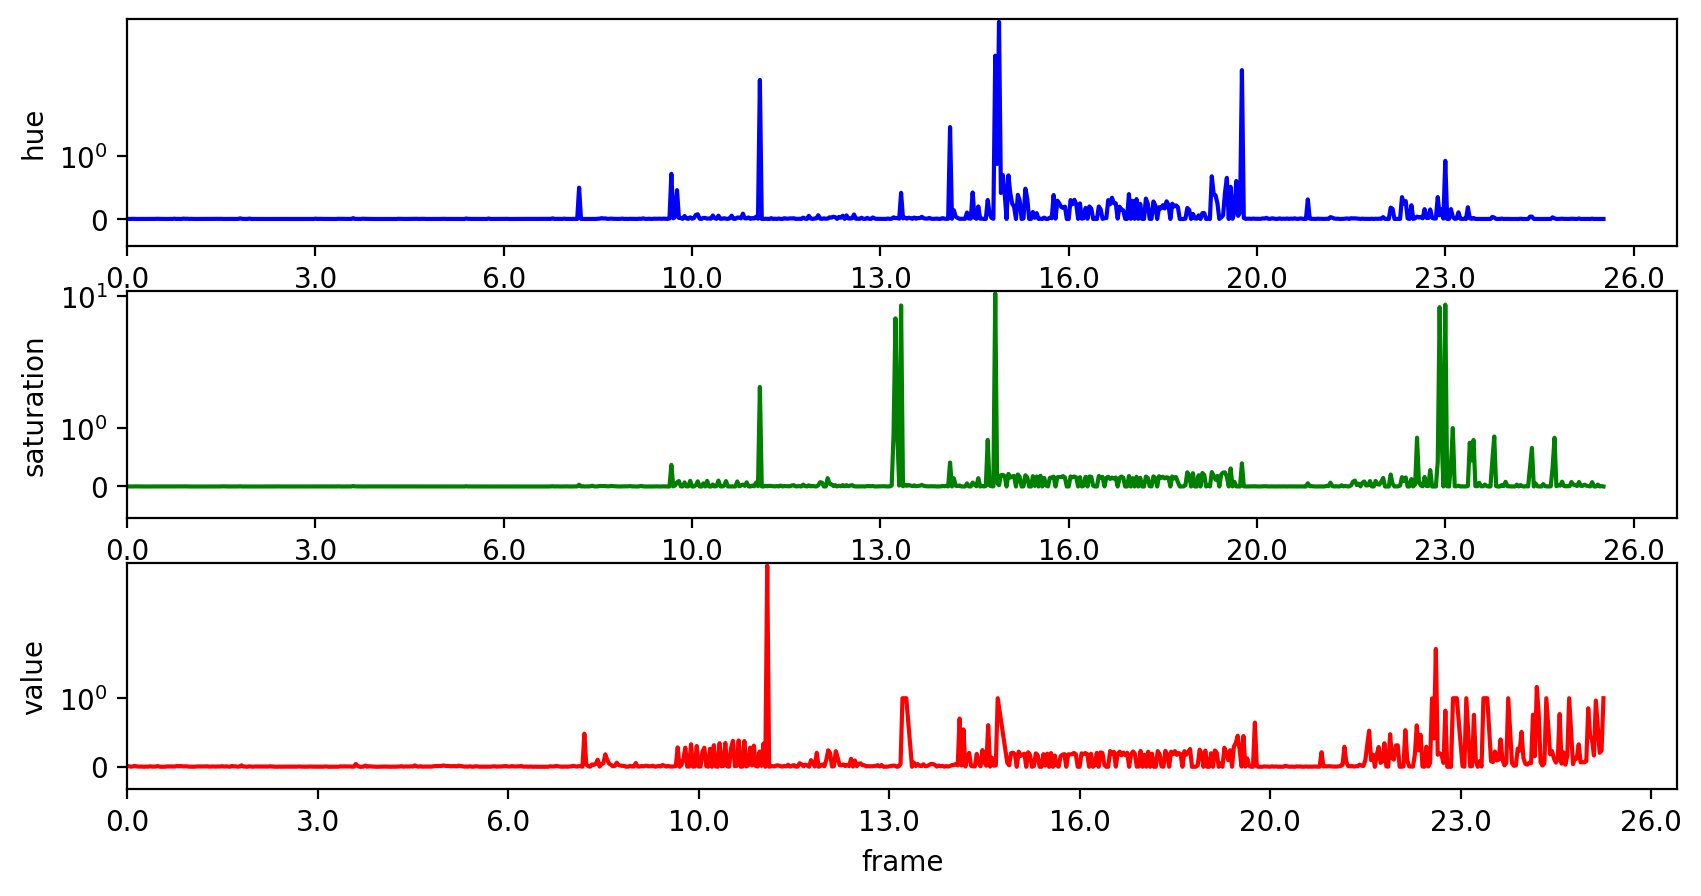

In [20]:
fig, axs = plt.subplots(3,1,figsize=(10,5))
for ax, channel, color in zip(axs,masked_df.columns, colors):
    line = pct_line(grouping, channel)
    # line = line[line.index.isin(range(480,580))]
    sns.lineplot(line,ax=ax,color=color)
    ax.set_xlim(0)
    ax.set_xticklabels([float(label.get_text())//30 for label in ax.get_xticklabels()])
    ax.set_yscale('symlog')
plt.show()


(0.0, 11.489442876136847)

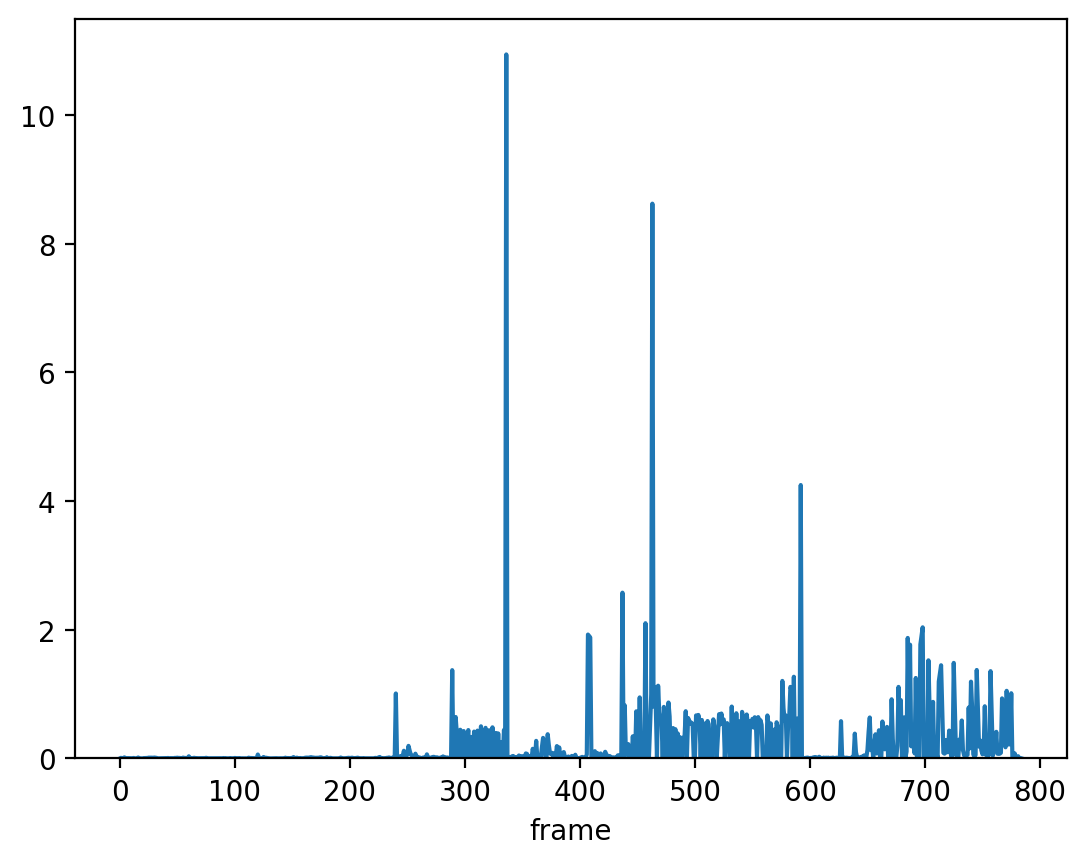

In [25]:
sum_delta = changes.sum(axis=1)
limit = lambda df,frames: df[df.index.get_level_values(0).isin(frames)]
sns.lineplot(sum_delta)
plt.ylim(0)
